<a href="https://colab.research.google.com/github/alex-smith-uwec/wittgenstein/blob/main/Blue_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install top2vec. After the unistall/re-install of numpy, you need to restart runtime!

In [ ]:
%%capture
!pip install top2vec

# Seems an upgrade of numpy is needed. 1.23.5 seems to work. import top2vec below indicates  NumPy version >=1.16.5 and <1.23.0

Also import top2vec and top2vec[sentence_encoders].

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.23.5

##Need to restart runtime after this!!

Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.1 MB/s eta 0:00:00


In [ ]:
import top2vec

In [ ]:
pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install top2vec[indexing]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.7.0-cp39-cp39-linux_x86_64.whl size=2118562 sha256=4a2a7fca6e3cbe47b5946cee2740dfe02e2defc35d70c99157cb5ca53d981c9d
  Stored in directory: /root/.cache/pip/wheels/ba/26/61/fface6c407f56418b3140cd7645917f20ba6b27d4e32b2bd20
Successfully built hnswlib


# Read in Wittgenstein text

In [1]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import bs4 as bs
import urllib.request

In [4]:
scrapped_data=urllib.request.urlopen("https://www.wittgensteinproject.org/w/index.php/Blue_Book")
article=scrapped_data.read()

parsed_article=bs.BeautifulSoup(article,'lxml')
paragraphs=parsed_article.find_all('p')
article_text=""
for p in paragraphs:
  article_text+=p.text

In [6]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import gensim

In [9]:
blue_sents=gensim.summarization.textcleaner.split_sentences(article_text)

In [10]:
blue_s = [[s] for s in blue_sents]
print(blue_s[10:12])

[["We feel that we can't point to anything in reply to them and yet ought to point to something."], ['(We are up against one of the great sources of philosophical bewilderment: we try to find a substance for a substantive.)']]


In [11]:
with open('blue_s.txt', 'w') as file:
    # Write each inner list as a string to the file
    for lst in blue_s:
        file.write(str(lst) + '\n')

In [12]:
with open('/content/drive/MyDrive//NLP/Witt/blue_s.txt', 'r') as file:
    # Read each line from the file and convert it to a list of lists
     blue_s = [eval(line) for line in file.readlines()]
     ##blue_s is a list of lists...so need to get the same structure for tractus)eng_cleaned.txt

In [ ]:
# with open('/content/drive/MyDrive/Witt/tractus_eng_cleaned.txt', 'r') as file:
# # tractus_s = [eval(line) for line in file.readlines()]

In [ ]:
# with open('/content/drive/MyDrive/Witt/tractus_eng_cleaned.txt', 'r') as file:
#   tractus_s = file.read()
  
# lines = tractus_s.split('\n')
# tractus_s = []
# current_chunk = []
# for line in lines:
#     if line == '':
#         tractus_s.append(current_chunk)
#         current_chunk = []
#     else:
#         current_chunk.append(line)
# if current_chunk:
#    tractus_s.append(current_chunk)

# print(tractus_s)

In [14]:
flat_blue_s = [elem for sublist in blue_s for elem in sublist]
print(flat_blue_s[170])


You know what ‘three feet under the ground’ means, and you know what ‘I feel’ means.” But I should answer him: “I know what a word means in certain contexts.


In [ ]:
from top2vec import Top2Vec

In [ ]:
# print(Top2Vec.__doc__)

In [ ]:
# dir(Top2Vec)

In [ ]:
# model = Top2Vec(flat_blue_s, embedding_model='universal-sentence-encoder-multilingual',min_count=2,speed='deep-learn', workers=4)
model = Top2Vec(flat_blue_s, embedding_model='doc2vec',min_count=2,speed='deep-learn', workers=4)
# model = Top2Vec(flat_blue_s,speed='deep-learn', workers=4)

2023-03-11 19:17:10,677 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-03-11 19:17:11,042 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-03-11 19:18:14,250 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-03-11 19:18:29,112 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-03-11 19:18:29,201 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.save("/content/drive/MyDrive/NLP/Witt/blue_model")

In [ ]:
model = Top2Vec.load("/content/drive/MyDrive/Colab Notebooks/blue_model")

In [ ]:
# dir(model)

In [ ]:
model.get_num_topics()

10

In [ ]:
# dir(Top2Vec)

In [ ]:
# print(model.__doc__)

In [ ]:
doc_clusters, cluster_scores, cluster_nums = model.search_documents_by_topic(topic_num=2,num_docs=84)


In [ ]:
topic_words, word_scores, topic_nums = model.get_topics()

In [ ]:
# for topic in topic_nums:
#      model.generate_topic_wordcloud(topic)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1232, Score: 0.6691494584083557
-----------
But it was quite superfluous to point to himself.
-----------

Document: 1008, Score: 0.6237260699272156
-----------
Now are we to say we have the same pain or different ones?
-----------



In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["word"], num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 492, Score: 0.298188716173172
-----------
I may have given a definition of a word and used the word accordingly, or those who taught me the use of the word may have given me the explanation.
-----------

Document: 427, Score: 0.2650626301765442
-----------
There |(Ts-309,38) is a temptation to think that this question is only vaguely relevant, if relevant at all, to the question: “what is the meaning of the word ‘to know’?” We seem to be on a side-track when we ask the question “What is it like in this case ‘to get to know’?” But this question really is a question concerning the grammar of the word “to know”, and this becomes clearer if we put it in the form: “What do we call ‘getting to know’?” It is part of the grammar of the word “chair” that this is what we call “to sit on a chair”, and it is a part of the grammar of the word “meaning” that this is what we call “explanation of a meaning”; in the same way to explain my criterion for another person's having toothache is to 

In [ ]:
words, word_scores = model.similar_words(keywords=["language"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ordinary 0.5212920854008962
our 0.44606531151055234
games 0.3699051628461357
forms 0.36065082290794465
more 0.34868208012369095
languages 0.3390391892394896
highly 0.3344407232185669
closely 0.3337259652584771
working 0.3313281745405614
processes 0.3305203706521114


In [ ]:
# pip install gensim==3.8.3

In [ ]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from top2vec import Top2Vec
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
vectors_blue=model.document_vectors

In [ ]:
import numpy as np

In [ ]:
np.save('/content/drive/MyDrive/NLP/Witt/vectors_blue.npy', vectors_blue)

In [ ]:
model.doc_top

array([9, 5, 8, ..., 6, 3, 1])

In [ ]:
labels_blue=model.doc_top

In [ ]:
np.save('/content/drive/MyDrive/NLP/Witt/labels_blue.npy', labels_blue)

In [ ]:
pca = PCA(n_components=2)
doc_weights = pca.fit_transform(model.document_vectors)

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})

In [ ]:
doc_weights.shape

(1345, 2)

In [ ]:
[doc_weights[13,0],doc_weights[13,1]]
[model.doc_top[300:400]]

[array([4, 4, 4, 5, 3, 4, 2, 2, 5, 4, 4, 2, 3, 2, 9, 9, 3, 4, 4, 7, 4, 6,
        3, 3, 4, 5, 2, 9, 5, 9, 3, 3, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 3, 3,
        4, 2, 2, 3, 5, 4, 0, 5, 4, 2, 5, 5, 6, 4, 4, 3, 4, 4, 4, 0, 1, 3,
        4, 9, 0, 7, 9, 4, 2, 3, 4, 3, 4, 4, 4, 7, 9, 4, 4, 5, 1, 4, 3, 2,
        4, 9, 2, 1, 1, 5, 2, 4, 4, 2, 4, 1])]

<AxesSubplot:>

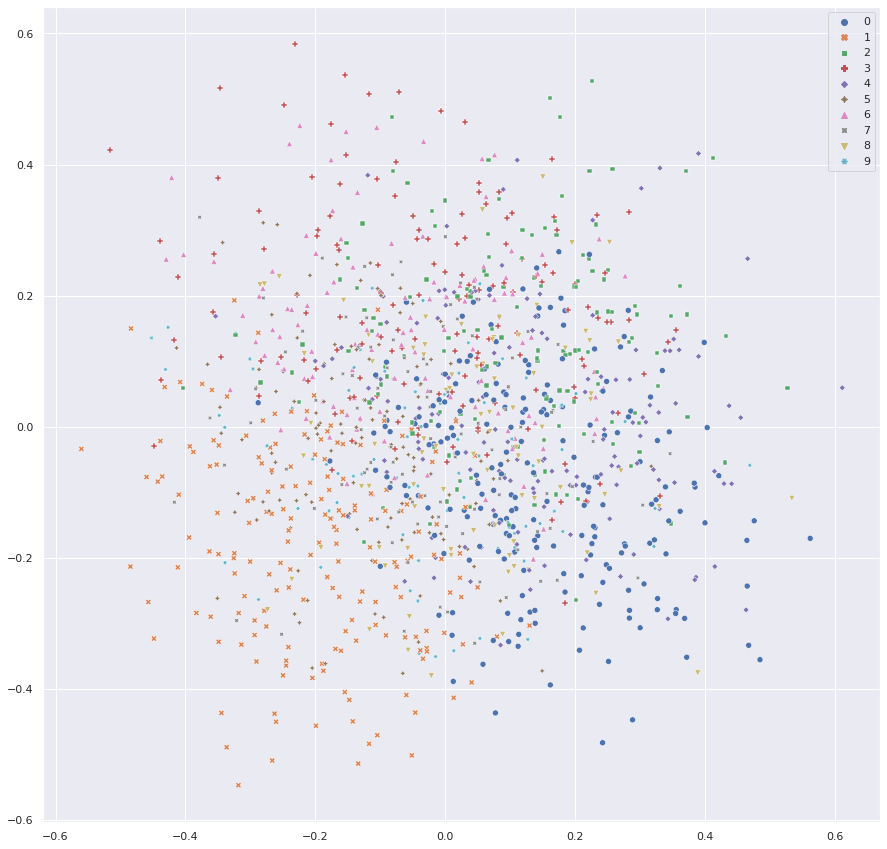

In [ ]:
# 
sns.scatterplot(x=doc_weights[:,0], y=doc_weights[:,1], hue=model.doc_top,style=model.doc_top,palette="deep")


In [ ]:
model.doc_top[10]

5

# umap noodling

In [ ]:
# !pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=4a8306e006b190a192151737212d91e30722557ba77fbe0389b5533b8669387d
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [ ]:
!pip uninstall umap
!pip install umap-learn -i https://mirrors.ustc.edu.cn/pypi/web/simple


Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap.umap_ as umap

In [ ]:
import umap.plot

umap_args_model = {
"n_neighbors": 10,
"n_components": 2, 
"metric": "cosine",
'min_dist':0.10,
'spread':1
}



In [ ]:
# dir(umap.plot)

In [ ]:
umap_model = umap.UMAP(**umap_args_model).fit(topic_model._get_document_vectors(norm=False))
umap_fig2 = umap.plot.points(umap_model, labels = topic_model.doc_top, theme='fire')

AttributeError: ignored

In [ ]:
print(umap.map__doc__)

AttributeError: ignored

In [ ]:
import umap.umap_ as umap
# umap_args_model = {"n_neighbors": 10,"n_components": 2, -> 2 for plotting "metric": "cosine",'min_dist':0.10,'spread':1}
umap_model = umap.UMAP(**umap_args_model).fit(topic_model._get_document_vectors(norm=False))
umap_fig2 = umap.plot.points(umap_model, theme='fire')



NameError: ignored

In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=58e705478ae5854b1e60746336b384169901a69e6593fc264bf7ef50e7e7c80a
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


In [ ]:
import umap.plot

umap.plot.points(umap_model, labels=model.doc_top_reduced)


NameError: ignored

In [ ]:
import umap
import numpy as np

# create a random dataset
X = np.random.rand(100, 10)

# fit a UMAP model to the dataset
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_model.fit(X)

# plot the points with their labels
labels = np.random.randint(0, 2, size=100) # generate random labels
umap.plot.points(umap_model, labels=labels)


ModuleNotFoundError: ignored

In [ ]:
import top2vec

# Initialize Top2Vec model
# model = top2vec.Top2Vec(flat_blue_s, speed="fast-learn", workers=4)

# Get the document vectors
doc_vectors = model.document_vectors

# Get the document vectors
# doc_vectors = model.doc_vectors



In [ ]:
# dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_documents_to_topic',
 '_calculate_documents_topic',
 '_calculate_topic_sizes',
 '_check_document_index_status',
 '_check_hnswlib_status',
 '_check_import_status',
 '_check_model_status',
 '_check_word_index_status',
 '_create_topic_vectors',
 '_deduplicate_topics',
 '_embed_documents',
 '_embed_query',
 '_find_topic_words_and_scores',
 '_get_combined_vec',
 '_get_document_ids',
 '_get_document_indexes',
 '_l2_normalize',
 '_less_than_zero',
 '_reorder_topics',
 '_search_vectors_by_vector',
 '_unassign_documents_from_topic',
 '_validate_doc_ids',
 '_validate_document_ids_add_doc',
 '_validate_documents',
 '_valida

In [ ]:
import umap
import top2vec
from top2vec import Top2Vec
import numpy as np

# load or create a Top2Vec model
# model = Top2Vec.load("model.bin")

# get the document vectors from the Top2Vec model
# doc_vectors = model.get_document_vectors()
doc_vectors = model.document_vectors
# fit a UMAP model to the document vectors
umap_model = umap.UMAP(n_components=2)
umap_vectors = umap_model.fit_transform(doc_vectors)

# plot the points with their labels
# labels = model.get_labels(doc_vectors)
# umap.plot.(umap_vectors)


NameError: ignored

In [ ]:
# umap.plot.points(umap_vectors)
umap.plot.points(umap_vectors)


AttributeError: ignored

In [ ]:
print(type(umap_vectors))
print(type(doc_vectors))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(doc_vectors)
print(umap_vectors)

[[-0.0516625  -0.05905324 -0.09758792 ... -0.01140083  0.0957823
  -0.06709458]
 [-0.0410013   0.07739833  0.02023422 ... -0.05128045 -0.04539756
   0.04677253]
 [-0.07393715  0.01913104 -0.00680959 ... -0.08066118 -0.02011736
   0.01024167]
 ...
 [-0.08287487  0.01972073 -0.09953605 ...  0.04402947  0.04155045
   0.07120984]
 [-0.09195063  0.02216754  0.03760853 ... -0.04562432  0.0305517
  -0.11655645]
 [-0.09101567  0.03985436  0.07022674 ... -0.02616198  0.11409373
  -0.07801113]]
[[ 7.9377503  3.9965484]
 [ 9.783174   2.8837514]
 [ 8.197395   1.8770157]
 ...
 [10.714297   0.300878 ]
 [ 6.6842766  1.1613619]
 [ 8.269678   2.3204124]]


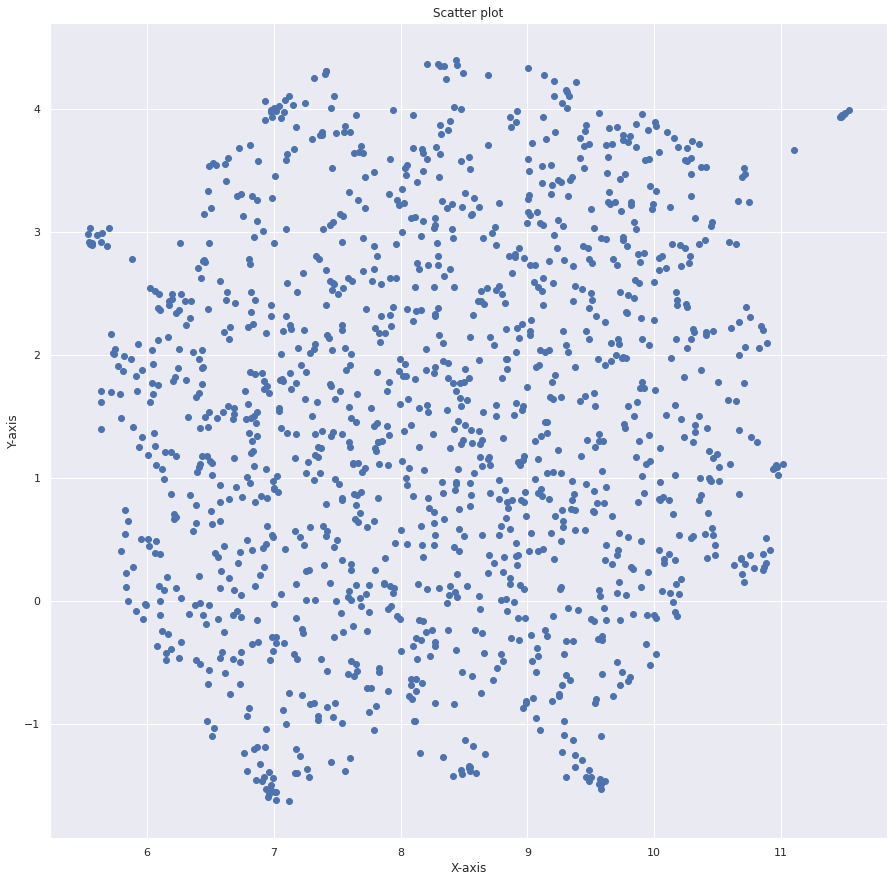

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
# data = np.array([[ 1.0252457, -3.3539124 ],
#                  [-0.8038861, -0.8391528 ],
#                  [-0.9714867, -0.06228136],
#                  [-2.6796947, -3.7906108 ],
#                  [-1.321985, -1.3234278 ],
#                  [-4.2054076, 0.91586375]])

# Plot the data as a scatter plot
plt.scatter(umap_vectors[:,0], umap_vectors[:,1])

# Set the x and y axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Set the plot title
plt.title('Scatter plot')

# Show the plot
plt.show()


In [ ]:
dir(umap)

['AlignedUMAP',
 'ParametricUMAP',
 'UMAP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'aligned_umap',
 'catch_warnings',
 'distances',
 'layouts',
 'numba',
 'parametric_umap',
 'pkg_resources',
 'plot',
 'simplefilter',
 'sparse',
 'spectral',
 'umap_',
 'utils',
 'warn']

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(doc_vectors)
embedding.shape

(1345, 2)

In [ ]:
import seaborn as sns

In [ ]:
# plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in doc_vectors])
# sns.scatterplot(umap_vectors[:,0],umap_vectors[:1])
sns.scatterplot(x=umap_vectors[:,0],y=umap_vectors[:1])

ValueError: ignored

In [ ]:
print(umap_vectors[3,1])

-0.32290882


In [ ]:
print(embedding[3,1])

4.896


In [ ]:
import top2vec

print(top2vec.__version__)


1.0.28


In [ ]:
import numpy as np
import umap
from umap.plot import points

# Generate some random data
data = np.random.rand(100, 10)

# Reduce the dimensionality of the data using UMAP
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='euclidean')
embedding = reducer.fit_transform(data)

# Plot the data
fig = points(embedding, labels=None)


AttributeError: ignored

# https://github.com/ddangelov/Top2Vec/issues/133